In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

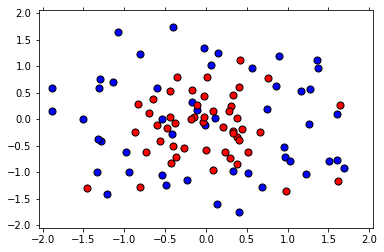

In [11]:
def load_pts(csv_name):
    data = np.asarray(pd.read_csv(csv_name, header=None))
    X = data[:,0:2]
    y = data[:,2]

    plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')
    
    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    return X,y

X, y = load_pts('data/grid_search.csv')

plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

#Fixing a random seed
import random
random.seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Define the model (with default hyperparameters)
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [14]:
def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s = s.reshape((np.size(r),np.size(r)))
    t = t.reshape((np.size(r),np.size(r)))
    z = z.reshape((np.size(r),np.size(r)))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()

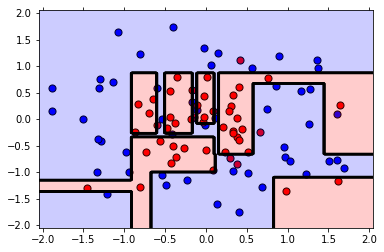

The Training F1 Score is 1.0
The Testing F1 Score is 0.7000000000000001


In [15]:
plot_model(X, y, clf)
print('The Training F1 Score is', f1_score(train_predictions, y_train))
print('The Testing F1 Score is', f1_score(test_predictions, y_test))

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, score=0.737, total=   0.0s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, score=0.706, total=   0.0s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, score=0.824, total=   0.0s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, score=0.471, total=   0.0s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, score=0.762, total=   0.0s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=4, score=0.737, t

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=10, score=0.471, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=10 ...........
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=10, score=0.762, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=12 ...........
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=12, score=0.737, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=12 ...........
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=12, score=0.706, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=12 ...........
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=12, score=0.824, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=12 ...........
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=12, score=0.471, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=12 ...........
[CV]  max_depth=2, min_samples_leaf=6, min_sam

[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=20, score=0.824, total=   0.0s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=20, score=0.375, total=   0.0s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=20, score=0.762, total=   0.0s
[CV] max_depth=2, min_samples_leaf=12, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf=12, min_samples_split=2, score=0.533, total=   0.0s
[CV] max_depth=2, min_samples_leaf=12, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf=12, min_samples_split=2, score=0.750, total=   0.0s
[CV] max_depth=2, min_samples_leaf=12, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf=12, min_samples_split=2, score=0.615, total=   0.0s
[CV] max_depth=2, min_samples_leaf=12, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf=12, min

[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=12, score=0.533, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=12, score=0.750, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=12, score=0.615, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=12, score=0.375, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=12, score=0.632, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=14, score=0.533, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_leaf=16, 

[CV]  max_depth=2, min_samples_leaf=20, min_samples_split=20, score=0.462, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, min_samples_split=20 ..........
[CV]  max_depth=2, min_samples_leaf=20, min_samples_split=20, score=0.714, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, min_samples_split=20 ..........
[CV]  max_depth=2, min_samples_leaf=20, min_samples_split=20, score=0.615, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, min_samples_split=20 ..........
[CV]  max_depth=2, min_samples_leaf=20, min_samples_split=20, score=0.154, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, min_samples_split=20 ..........
[CV]  max_depth=2, min_samples_leaf=20, min_samples_split=20, score=0.625, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.714, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=4, min_samples_leaf=2, min

[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=10, score=0.875, total=   0.0s
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=10 ...........
[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=10, score=0.500, total=   0.0s
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=10 ...........
[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=10, score=0.778, total=   0.0s
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=12 ...........
[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=12, score=0.714, total=   0.0s
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=12 ...........
[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=12, score=0.750, total=   0.0s
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=12 ...........
[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=12, score=0.875, total=   0.0s
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=12 ...........
[CV]  max_depth=4, min_samples_leaf=6, min_sam

[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=14, score=0.706, total=   0.0s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=14 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=14, score=0.750, total=   0.0s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=14 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=14, score=0.375, total=   0.0s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=14 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=14, score=0.762, total=   0.0s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=16 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=16, score=0.533, total=   0.0s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=16 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=16, score=0.706, total=   0.0s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=16 ..........
[CV]  max_depth=4, min_samples_leaf=10, 

[CV]  max_depth=4, min_samples_leaf=14, min_samples_split=20, score=0.375, total=   0.0s
[CV] max_depth=4, min_samples_leaf=14, min_samples_split=20 ..........
[CV]  max_depth=4, min_samples_leaf=14, min_samples_split=20, score=0.700, total=   0.0s
[CV] max_depth=4, min_samples_leaf=16, min_samples_split=2 ...........
[CV]  max_depth=4, min_samples_leaf=16, min_samples_split=2, score=0.533, total=   0.0s
[CV] max_depth=4, min_samples_leaf=16, min_samples_split=2 ...........
[CV]  max_depth=4, min_samples_leaf=16, min_samples_split=2, score=0.750, total=   0.0s
[CV] max_depth=4, min_samples_leaf=16, min_samples_split=2 ...........
[CV]  max_depth=4, min_samples_leaf=16, min_samples_split=2, score=0.615, total=   0.0s
[CV] max_depth=4, min_samples_leaf=16, min_samples_split=2 ...........
[CV]  max_depth=4, min_samples_leaf=16, min_samples_split=2, score=0.375, total=   0.0s
[CV] max_depth=4, min_samples_leaf=16, min_samples_split=2 ...........
[CV]  max_depth=4, min_samples_leaf=16, min_

[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=10, score=0.615, total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=10 ..........
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=10, score=0.154, total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=10 ..........
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=10, score=0.625, total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=12 ..........
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=12, score=0.462, total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=12 ..........
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=12, score=0.714, total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=12 ..........
[CV]  max_depth=4, min_samples_leaf=20, min_samples_split=12, score=0.615, total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, min_samples_split=12 ..........
[CV]  max_depth=4, min_samples_leaf=20, 

[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=16, score=0.571, total=   0.0s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=16 ...........
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=16, score=0.308, total=   0.0s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=18 ...........
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=18, score=0.714, total=   0.0s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=18 ...........
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=18, score=0.800, total=   0.0s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=18 ...........
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=18, score=0.933, total=   0.0s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=18 ...........
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=18, score=0.571, total=   0.0s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=18 ...........
[CV]  max_depth=6, min_samples_leaf=4, min_sam

[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=4, score=0.750, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=4 ...........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=4, score=0.375, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=4 ...........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=4, score=0.762, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=6 ...........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=6, score=0.533, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=6 ...........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=6, score=0.706, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=6 ...........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=6, score=0.750, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=6 ...........
[CV]  max_depth=6, min_samples_leaf=10, min_sa

[CV]  max_depth=6, min_samples_leaf=14, min_samples_split=10, score=0.533, total=   0.0s
[CV] max_depth=6, min_samples_leaf=14, min_samples_split=10 ..........
[CV]  max_depth=6, min_samples_leaf=14, min_samples_split=10, score=0.750, total=   0.0s
[CV] max_depth=6, min_samples_leaf=14, min_samples_split=10 ..........
[CV]  max_depth=6, min_samples_leaf=14, min_samples_split=10, score=0.615, total=   0.0s
[CV] max_depth=6, min_samples_leaf=14, min_samples_split=10 ..........
[CV]  max_depth=6, min_samples_leaf=14, min_samples_split=10, score=0.375, total=   0.0s
[CV] max_depth=6, min_samples_leaf=14, min_samples_split=10 ..........
[CV]  max_depth=6, min_samples_leaf=14, min_samples_split=10, score=0.700, total=   0.0s
[CV] max_depth=6, min_samples_leaf=14, min_samples_split=12 ..........
[CV]  max_depth=6, min_samples_leaf=14, min_samples_split=12, score=0.533, total=   0.0s
[CV] max_depth=6, min_samples_leaf=14, min_samples_split=12 ..........
[CV]  max_depth=6, min_samples_leaf=14, 

[CV]  max_depth=6, min_samples_leaf=18, min_samples_split=10, score=0.615, total=   0.0s
[CV] max_depth=6, min_samples_leaf=18, min_samples_split=10 ..........
[CV]  max_depth=6, min_samples_leaf=18, min_samples_split=10, score=0.154, total=   0.0s
[CV] max_depth=6, min_samples_leaf=18, min_samples_split=10 ..........
[CV]  max_depth=6, min_samples_leaf=18, min_samples_split=10, score=0.706, total=   0.0s
[CV] max_depth=6, min_samples_leaf=18, min_samples_split=12 ..........
[CV]  max_depth=6, min_samples_leaf=18, min_samples_split=12, score=0.462, total=   0.0s
[CV] max_depth=6, min_samples_leaf=18, min_samples_split=12 ..........
[CV]  max_depth=6, min_samples_leaf=18, min_samples_split=12, score=0.750, total=   0.0s
[CV] max_depth=6, min_samples_leaf=18, min_samples_split=12 ..........
[CV]  max_depth=6, min_samples_leaf=18, min_samples_split=12, score=0.615, total=   0.0s
[CV] max_depth=6, min_samples_leaf=18, min_samples_split=12 ..........
[CV]  max_depth=6, min_samples_leaf=18, 

[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=18, score=0.824, total=   0.0s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=20 ...........
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=20, score=0.714, total=   0.0s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=20 ...........
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=20, score=0.800, total=   0.0s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=20 ...........
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=20, score=0.667, total=   0.0s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=20 ...........
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=20, score=0.571, total=   0.0s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=20 ...........
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=20, score=0.824, total=   0.0s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=2 ............
[CV]  max_depth=8, min_samples_leaf=4, min_sam

[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=6, score=0.500, total=   0.0s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=6 ............
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=6, score=0.400, total=   0.0s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=6 ............
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=6, score=0.375, total=   0.0s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=8 ............
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=8, score=0.667, total=   0.0s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=8 ............
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=8, score=0.714, total=   0.0s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=8 ............
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=8, score=0.500, total=   0.0s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=8 ............
[CV]  max_depth=8, min_samples_leaf=8, min_samples_s

[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=16, score=0.533, total=   0.0s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=16 ..........
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=16, score=0.750, total=   0.0s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=16 ..........
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=16, score=0.615, total=   0.0s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=16 ..........
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=16, score=0.375, total=   0.0s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=16 ..........
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=16, score=0.762, total=   0.0s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=18 ..........
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=18, score=0.533, total=   0.0s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=18 ..........
[CV]  max_depth=8, min_samples_leaf=12, 

[CV]  max_depth=8, min_samples_leaf=18, min_samples_split=6, score=0.615, total=   0.0s
[CV] max_depth=8, min_samples_leaf=18, min_samples_split=6 ...........
[CV]  max_depth=8, min_samples_leaf=18, min_samples_split=6, score=0.154, total=   0.0s
[CV] max_depth=8, min_samples_leaf=18, min_samples_split=6 ...........
[CV]  max_depth=8, min_samples_leaf=18, min_samples_split=6, score=0.706, total=   0.0s
[CV] max_depth=8, min_samples_leaf=18, min_samples_split=8 ...........
[CV]  max_depth=8, min_samples_leaf=18, min_samples_split=8, score=0.462, total=   0.0s
[CV] max_depth=8, min_samples_leaf=18, min_samples_split=8 ...........
[CV]  max_depth=8, min_samples_leaf=18, min_samples_split=8, score=0.750, total=   0.0s
[CV] max_depth=8, min_samples_leaf=18, min_samples_split=8 ...........
[CV]  max_depth=8, min_samples_leaf=18, min_samples_split=8, score=0.615, total=   0.0s
[CV] max_depth=8, min_samples_leaf=18, min_samples_split=8 ...........
[CV]  max_depth=8, min_samples_leaf=18, min_sa

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, score=0.667, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16 ..........
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, score=0.571, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16 ..........
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, score=0.778, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=18 ..........
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=18, score=0.714, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=18 ..........
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=18, score=0.800, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=18 ..........
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=18, score=0.667, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=18 ..........
[CV]  max_depth=10, min_samples_leaf=2, 

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=6, score=0.375, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8 ...........
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, score=0.667, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8 ...........
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, score=0.714, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8 ...........
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, score=0.500, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8 ...........
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, score=0.400, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8 ...........
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, score=0.375, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=10 ..........
[CV]  max_depth=10, min_samples_leaf=8, min_sa

[CV]  max_depth=10, min_samples_leaf=12, min_samples_split=4, score=0.375, total=   0.0s
[CV] max_depth=10, min_samples_leaf=12, min_samples_split=4 ..........
[CV]  max_depth=10, min_samples_leaf=12, min_samples_split=4, score=0.762, total=   0.0s
[CV] max_depth=10, min_samples_leaf=12, min_samples_split=6 ..........
[CV]  max_depth=10, min_samples_leaf=12, min_samples_split=6, score=0.533, total=   0.0s
[CV] max_depth=10, min_samples_leaf=12, min_samples_split=6 ..........
[CV]  max_depth=10, min_samples_leaf=12, min_samples_split=6, score=0.750, total=   0.0s
[CV] max_depth=10, min_samples_leaf=12, min_samples_split=6 ..........
[CV]  max_depth=10, min_samples_leaf=12, min_samples_split=6, score=0.615, total=   0.0s
[CV] max_depth=10, min_samples_leaf=12, min_samples_split=6 ..........
[CV]  max_depth=10, min_samples_leaf=12, min_samples_split=6, score=0.375, total=   0.0s
[CV] max_depth=10, min_samples_leaf=12, min_samples_split=6 ..........
[CV]  max_depth=10, min_samples_leaf=12,

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=10, score=0.375, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=10 .........
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=10, score=0.632, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=12 .........
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=12, score=0.533, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=12 .........
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=12, score=0.750, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=12 .........
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=12, score=0.615, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=12 .........
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=12, score=0.375, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=12 .........
[CV]  max_depth=10, min_samples_le

[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.714, total=   0.0s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=2 ...........
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.714, total=   0.0s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=2 ...........
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.400, total=   0.0s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=2 ...........
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.462, total=   0.0s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=4 ...........
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=4, score=0.200, total=   0.0s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=4 ...........
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=4, score=0.714, total=   0.0s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=4 ...........
[CV]  max_depth=12, min_samples_leaf=2, min_sa

[CV]  max_depth=12, min_samples_leaf=6, min_samples_split=12, score=0.714, total=   0.0s
[CV] max_depth=12, min_samples_leaf=6, min_samples_split=12 ..........
[CV]  max_depth=12, min_samples_leaf=6, min_samples_split=12, score=0.714, total=   0.0s
[CV] max_depth=12, min_samples_leaf=6, min_samples_split=12 ..........
[CV]  max_depth=12, min_samples_leaf=6, min_samples_split=12, score=0.800, total=   0.0s
[CV] max_depth=12, min_samples_leaf=6, min_samples_split=12 ..........
[CV]  max_depth=12, min_samples_leaf=6, min_samples_split=12, score=0.500, total=   0.0s
[CV] max_depth=12, min_samples_leaf=6, min_samples_split=12 ..........
[CV]  max_depth=12, min_samples_leaf=6, min_samples_split=12, score=0.308, total=   0.0s
[CV] max_depth=12, min_samples_leaf=6, min_samples_split=14 ..........
[CV]  max_depth=12, min_samples_leaf=6, min_samples_split=14, score=0.714, total=   0.0s
[CV] max_depth=12, min_samples_leaf=6, min_samples_split=14 ..........
[CV]  max_depth=12, min_samples_leaf=6, 

[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=20, score=0.375, total=   0.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=20 .........
[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=20, score=0.762, total=   0.0s
[CV] max_depth=12, min_samples_leaf=12, min_samples_split=2 ..........
[CV]  max_depth=12, min_samples_leaf=12, min_samples_split=2, score=0.533, total=   0.0s
[CV] max_depth=12, min_samples_leaf=12, min_samples_split=2 ..........
[CV]  max_depth=12, min_samples_leaf=12, min_samples_split=2, score=0.750, total=   0.0s
[CV] max_depth=12, min_samples_leaf=12, min_samples_split=2 ..........
[CV]  max_depth=12, min_samples_leaf=12, min_samples_split=2, score=0.615, total=   0.0s
[CV] max_depth=12, min_samples_leaf=12, min_samples_split=2 ..........
[CV]  max_depth=12, min_samples_leaf=12, min_samples_split=2, score=0.375, total=   0.0s
[CV] max_depth=12, min_samples_leaf=12, min_samples_split=2 ..........
[CV]  max_depth=12, min_samples_leaf=1

[CV]  max_depth=12, min_samples_leaf=16, min_samples_split=8, score=0.375, total=   0.0s
[CV] max_depth=12, min_samples_leaf=16, min_samples_split=8 ..........
[CV]  max_depth=12, min_samples_leaf=16, min_samples_split=8, score=0.632, total=   0.0s
[CV] max_depth=12, min_samples_leaf=16, min_samples_split=10 .........
[CV]  max_depth=12, min_samples_leaf=16, min_samples_split=10, score=0.533, total=   0.0s
[CV] max_depth=12, min_samples_leaf=16, min_samples_split=10 .........
[CV]  max_depth=12, min_samples_leaf=16, min_samples_split=10, score=0.750, total=   0.0s
[CV] max_depth=12, min_samples_leaf=16, min_samples_split=10 .........
[CV]  max_depth=12, min_samples_leaf=16, min_samples_split=10, score=0.615, total=   0.0s
[CV] max_depth=12, min_samples_leaf=16, min_samples_split=10 .........
[CV]  max_depth=12, min_samples_leaf=16, min_samples_split=10, score=0.375, total=   0.0s
[CV] max_depth=12, min_samples_leaf=16, min_samples_split=10 .........
[CV]  max_depth=12, min_samples_leaf

[CV]  max_depth=12, min_samples_leaf=20, min_samples_split=10, score=0.625, total=   0.0s
[CV] max_depth=12, min_samples_leaf=20, min_samples_split=12 .........
[CV]  max_depth=12, min_samples_leaf=20, min_samples_split=12, score=0.462, total=   0.0s
[CV] max_depth=12, min_samples_leaf=20, min_samples_split=12 .........
[CV]  max_depth=12, min_samples_leaf=20, min_samples_split=12, score=0.714, total=   0.0s
[CV] max_depth=12, min_samples_leaf=20, min_samples_split=12 .........
[CV]  max_depth=12, min_samples_leaf=20, min_samples_split=12, score=0.615, total=   0.0s
[CV] max_depth=12, min_samples_leaf=20, min_samples_split=12 .........
[CV]  max_depth=12, min_samples_leaf=20, min_samples_split=12, score=0.154, total=   0.0s
[CV] max_depth=12, min_samples_leaf=20, min_samples_split=12 .........
[CV]  max_depth=12, min_samples_leaf=20, min_samples_split=12, score=0.625, total=   0.0s
[CV] max_depth=12, min_samples_leaf=20, min_samples_split=14 .........
[CV]  max_depth=12, min_samples_le

[CV]  max_depth=14, min_samples_leaf=4, min_samples_split=12, score=0.308, total=   0.0s
[CV] max_depth=14, min_samples_leaf=4, min_samples_split=14 ..........
[CV]  max_depth=14, min_samples_leaf=4, min_samples_split=14, score=0.364, total=   0.0s
[CV] max_depth=14, min_samples_leaf=4, min_samples_split=14 ..........
[CV]  max_depth=14, min_samples_leaf=4, min_samples_split=14, score=0.800, total=   0.0s
[CV] max_depth=14, min_samples_leaf=4, min_samples_split=14 ..........
[CV]  max_depth=14, min_samples_leaf=4, min_samples_split=14, score=0.667, total=   0.0s
[CV] max_depth=14, min_samples_leaf=4, min_samples_split=14 ..........
[CV]  max_depth=14, min_samples_leaf=4, min_samples_split=14, score=0.571, total=   0.0s
[CV] max_depth=14, min_samples_leaf=4, min_samples_split=14 ..........
[CV]  max_depth=14, min_samples_leaf=4, min_samples_split=14, score=0.308, total=   0.0s
[CV] max_depth=14, min_samples_leaf=4, min_samples_split=16 ..........
[CV]  max_depth=14, min_samples_leaf=4, 

[CV]  max_depth=14, min_samples_leaf=10, min_samples_split=2, score=0.762, total=   0.0s
[CV] max_depth=14, min_samples_leaf=10, min_samples_split=4 ..........
[CV]  max_depth=14, min_samples_leaf=10, min_samples_split=4, score=0.533, total=   0.0s
[CV] max_depth=14, min_samples_leaf=10, min_samples_split=4 ..........
[CV]  max_depth=14, min_samples_leaf=10, min_samples_split=4, score=0.706, total=   0.0s
[CV] max_depth=14, min_samples_leaf=10, min_samples_split=4 ..........
[CV]  max_depth=14, min_samples_leaf=10, min_samples_split=4, score=0.750, total=   0.0s
[CV] max_depth=14, min_samples_leaf=10, min_samples_split=4 ..........
[CV]  max_depth=14, min_samples_leaf=10, min_samples_split=4, score=0.375, total=   0.0s
[CV] max_depth=14, min_samples_leaf=10, min_samples_split=4 ..........
[CV]  max_depth=14, min_samples_leaf=10, min_samples_split=4, score=0.762, total=   0.0s
[CV] max_depth=14, min_samples_leaf=10, min_samples_split=6 ..........
[CV]  max_depth=14, min_samples_leaf=10,

[CV]  max_depth=14, min_samples_leaf=14, min_samples_split=10, score=0.750, total=   0.0s
[CV] max_depth=14, min_samples_leaf=14, min_samples_split=10 .........
[CV]  max_depth=14, min_samples_leaf=14, min_samples_split=10, score=0.615, total=   0.0s
[CV] max_depth=14, min_samples_leaf=14, min_samples_split=10 .........
[CV]  max_depth=14, min_samples_leaf=14, min_samples_split=10, score=0.375, total=   0.0s
[CV] max_depth=14, min_samples_leaf=14, min_samples_split=10 .........
[CV]  max_depth=14, min_samples_leaf=14, min_samples_split=10, score=0.700, total=   0.0s
[CV] max_depth=14, min_samples_leaf=14, min_samples_split=12 .........
[CV]  max_depth=14, min_samples_leaf=14, min_samples_split=12, score=0.533, total=   0.0s
[CV] max_depth=14, min_samples_leaf=14, min_samples_split=12 .........
[CV]  max_depth=14, min_samples_leaf=14, min_samples_split=12, score=0.750, total=   0.0s
[CV] max_depth=14, min_samples_leaf=14, min_samples_split=12 .........
[CV]  max_depth=14, min_samples_le

[CV]  max_depth=14, min_samples_leaf=16, min_samples_split=16, score=0.615, total=   0.0s
[CV] max_depth=14, min_samples_leaf=16, min_samples_split=16 .........
[CV]  max_depth=14, min_samples_leaf=16, min_samples_split=16, score=0.375, total=   0.0s
[CV] max_depth=14, min_samples_leaf=16, min_samples_split=16 .........
[CV]  max_depth=14, min_samples_leaf=16, min_samples_split=16, score=0.632, total=   0.0s
[CV] max_depth=14, min_samples_leaf=16, min_samples_split=18 .........
[CV]  max_depth=14, min_samples_leaf=16, min_samples_split=18, score=0.533, total=   0.0s
[CV] max_depth=14, min_samples_leaf=16, min_samples_split=18 .........
[CV]  max_depth=14, min_samples_leaf=16, min_samples_split=18, score=0.750, total=   0.0s
[CV] max_depth=14, min_samples_leaf=16, min_samples_split=18 .........
[CV]  max_depth=14, min_samples_leaf=16, min_samples_split=18, score=0.615, total=   0.0s
[CV] max_depth=14, min_samples_leaf=16, min_samples_split=18 .........
[CV]  max_depth=14, min_samples_le

[CV]  max_depth=16, min_samples_leaf=2, min_samples_split=2, score=0.462, total=   0.0s
[CV] max_depth=16, min_samples_leaf=2, min_samples_split=4 ...........
[CV]  max_depth=16, min_samples_leaf=2, min_samples_split=4, score=0.200, total=   0.0s
[CV] max_depth=16, min_samples_leaf=2, min_samples_split=4 ...........
[CV]  max_depth=16, min_samples_leaf=2, min_samples_split=4, score=0.714, total=   0.0s
[CV] max_depth=16, min_samples_leaf=2, min_samples_split=4 ...........
[CV]  max_depth=16, min_samples_leaf=2, min_samples_split=4, score=0.714, total=   0.0s
[CV] max_depth=16, min_samples_leaf=2, min_samples_split=4 ...........
[CV]  max_depth=16, min_samples_leaf=2, min_samples_split=4, score=0.400, total=   0.0s
[CV] max_depth=16, min_samples_leaf=2, min_samples_split=4 ...........
[CV]  max_depth=16, min_samples_leaf=2, min_samples_split=4, score=0.462, total=   0.0s
[CV] max_depth=16, min_samples_leaf=2, min_samples_split=6 ...........
[CV]  max_depth=16, min_samples_leaf=2, min_sa

[CV]  max_depth=16, min_samples_leaf=6, min_samples_split=12, score=0.714, total=   0.0s
[CV] max_depth=16, min_samples_leaf=6, min_samples_split=12 ..........
[CV]  max_depth=16, min_samples_leaf=6, min_samples_split=12, score=0.800, total=   0.0s
[CV] max_depth=16, min_samples_leaf=6, min_samples_split=12 ..........
[CV]  max_depth=16, min_samples_leaf=6, min_samples_split=12, score=0.500, total=   0.0s
[CV] max_depth=16, min_samples_leaf=6, min_samples_split=12 ..........
[CV]  max_depth=16, min_samples_leaf=6, min_samples_split=12, score=0.308, total=   0.0s
[CV] max_depth=16, min_samples_leaf=6, min_samples_split=14 ..........
[CV]  max_depth=16, min_samples_leaf=6, min_samples_split=14, score=0.714, total=   0.0s
[CV] max_depth=16, min_samples_leaf=6, min_samples_split=14 ..........
[CV]  max_depth=16, min_samples_leaf=6, min_samples_split=14, score=0.714, total=   0.0s
[CV] max_depth=16, min_samples_leaf=6, min_samples_split=14 ..........
[CV]  max_depth=16, min_samples_leaf=6, 

[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=18, score=0.762, total=   0.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=20 .........
[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=20, score=0.533, total=   0.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=20 .........
[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=20, score=0.706, total=   0.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=20 .........
[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=20, score=0.750, total=   0.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=20 .........
[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=20, score=0.375, total=   0.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=20 .........
[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=20, score=0.762, total=   0.0s
[CV] max_depth=16, min_samples_leaf=12, min_samples_split=2 ..........
[CV]  max_depth=16, min_samples_le

[CV]  max_depth=16, min_samples_leaf=16, min_samples_split=8, score=0.533, total=   0.0s
[CV] max_depth=16, min_samples_leaf=16, min_samples_split=8 ..........
[CV]  max_depth=16, min_samples_leaf=16, min_samples_split=8, score=0.750, total=   0.0s
[CV] max_depth=16, min_samples_leaf=16, min_samples_split=8 ..........
[CV]  max_depth=16, min_samples_leaf=16, min_samples_split=8, score=0.615, total=   0.0s
[CV] max_depth=16, min_samples_leaf=16, min_samples_split=8 ..........
[CV]  max_depth=16, min_samples_leaf=16, min_samples_split=8, score=0.375, total=   0.0s
[CV] max_depth=16, min_samples_leaf=16, min_samples_split=8 ..........
[CV]  max_depth=16, min_samples_leaf=16, min_samples_split=8, score=0.632, total=   0.0s
[CV] max_depth=16, min_samples_leaf=16, min_samples_split=10 .........
[CV]  max_depth=16, min_samples_leaf=16, min_samples_split=10, score=0.533, total=   0.0s
[CV] max_depth=16, min_samples_leaf=16, min_samples_split=10 .........
[CV]  max_depth=16, min_samples_leaf=16

[CV]  max_depth=16, min_samples_leaf=20, min_samples_split=14, score=0.625, total=   0.0s
[CV] max_depth=16, min_samples_leaf=20, min_samples_split=16 .........
[CV]  max_depth=16, min_samples_leaf=20, min_samples_split=16, score=0.462, total=   0.0s
[CV] max_depth=16, min_samples_leaf=20, min_samples_split=16 .........
[CV]  max_depth=16, min_samples_leaf=20, min_samples_split=16, score=0.714, total=   0.0s
[CV] max_depth=16, min_samples_leaf=20, min_samples_split=16 .........
[CV]  max_depth=16, min_samples_leaf=20, min_samples_split=16, score=0.615, total=   0.0s
[CV] max_depth=16, min_samples_leaf=20, min_samples_split=16 .........
[CV]  max_depth=16, min_samples_leaf=20, min_samples_split=16, score=0.154, total=   0.0s
[CV] max_depth=16, min_samples_leaf=20, min_samples_split=16 .........
[CV]  max_depth=16, min_samples_leaf=20, min_samples_split=16, score=0.625, total=   0.0s
[CV] max_depth=16, min_samples_leaf=20, min_samples_split=18 .........
[CV]  max_depth=16, min_samples_le

[CV]  max_depth=18, min_samples_leaf=4, min_samples_split=14, score=0.667, total=   0.0s
[CV] max_depth=18, min_samples_leaf=4, min_samples_split=14 ..........
[CV]  max_depth=18, min_samples_leaf=4, min_samples_split=14, score=0.571, total=   0.0s
[CV] max_depth=18, min_samples_leaf=4, min_samples_split=14 ..........
[CV]  max_depth=18, min_samples_leaf=4, min_samples_split=14, score=0.308, total=   0.0s
[CV] max_depth=18, min_samples_leaf=4, min_samples_split=16 ..........
[CV]  max_depth=18, min_samples_leaf=4, min_samples_split=16, score=0.714, total=   0.0s
[CV] max_depth=18, min_samples_leaf=4, min_samples_split=16 ..........
[CV]  max_depth=18, min_samples_leaf=4, min_samples_split=16, score=0.800, total=   0.0s
[CV] max_depth=18, min_samples_leaf=4, min_samples_split=16 ..........
[CV]  max_depth=18, min_samples_leaf=4, min_samples_split=16, score=0.667, total=   0.0s
[CV] max_depth=18, min_samples_leaf=4, min_samples_split=16 ..........
[CV]  max_depth=18, min_samples_leaf=4, 

[CV]  max_depth=18, min_samples_leaf=10, min_samples_split=2, score=0.375, total=   0.0s
[CV] max_depth=18, min_samples_leaf=10, min_samples_split=2 ..........
[CV]  max_depth=18, min_samples_leaf=10, min_samples_split=2, score=0.762, total=   0.0s
[CV] max_depth=18, min_samples_leaf=10, min_samples_split=4 ..........
[CV]  max_depth=18, min_samples_leaf=10, min_samples_split=4, score=0.533, total=   0.0s
[CV] max_depth=18, min_samples_leaf=10, min_samples_split=4 ..........
[CV]  max_depth=18, min_samples_leaf=10, min_samples_split=4, score=0.706, total=   0.0s
[CV] max_depth=18, min_samples_leaf=10, min_samples_split=4 ..........
[CV]  max_depth=18, min_samples_leaf=10, min_samples_split=4, score=0.750, total=   0.0s
[CV] max_depth=18, min_samples_leaf=10, min_samples_split=4 ..........
[CV]  max_depth=18, min_samples_leaf=10, min_samples_split=4, score=0.375, total=   0.0s
[CV] max_depth=18, min_samples_leaf=10, min_samples_split=4 ..........
[CV]  max_depth=18, min_samples_leaf=10,

[CV]  max_depth=18, min_samples_leaf=14, min_samples_split=6, score=0.533, total=   0.0s
[CV] max_depth=18, min_samples_leaf=14, min_samples_split=6 ..........
[CV]  max_depth=18, min_samples_leaf=14, min_samples_split=6, score=0.750, total=   0.0s
[CV] max_depth=18, min_samples_leaf=14, min_samples_split=6 ..........
[CV]  max_depth=18, min_samples_leaf=14, min_samples_split=6, score=0.615, total=   0.0s
[CV] max_depth=18, min_samples_leaf=14, min_samples_split=6 ..........
[CV]  max_depth=18, min_samples_leaf=14, min_samples_split=6, score=0.375, total=   0.0s
[CV] max_depth=18, min_samples_leaf=14, min_samples_split=6 ..........
[CV]  max_depth=18, min_samples_leaf=14, min_samples_split=6, score=0.700, total=   0.0s
[CV] max_depth=18, min_samples_leaf=14, min_samples_split=8 ..........
[CV]  max_depth=18, min_samples_leaf=14, min_samples_split=8, score=0.533, total=   0.0s
[CV] max_depth=18, min_samples_leaf=14, min_samples_split=8 ..........
[CV]  max_depth=18, min_samples_leaf=14,

[CV]  max_depth=18, min_samples_leaf=18, min_samples_split=6, score=0.750, total=   0.0s
[CV] max_depth=18, min_samples_leaf=18, min_samples_split=6 ..........
[CV]  max_depth=18, min_samples_leaf=18, min_samples_split=6, score=0.615, total=   0.0s
[CV] max_depth=18, min_samples_leaf=18, min_samples_split=6 ..........
[CV]  max_depth=18, min_samples_leaf=18, min_samples_split=6, score=0.154, total=   0.0s
[CV] max_depth=18, min_samples_leaf=18, min_samples_split=6 ..........
[CV]  max_depth=18, min_samples_leaf=18, min_samples_split=6, score=0.706, total=   0.0s
[CV] max_depth=18, min_samples_leaf=18, min_samples_split=8 ..........
[CV]  max_depth=18, min_samples_leaf=18, min_samples_split=8, score=0.462, total=   0.0s
[CV] max_depth=18, min_samples_leaf=18, min_samples_split=8 ..........
[CV]  max_depth=18, min_samples_leaf=18, min_samples_split=8, score=0.750, total=   0.0s
[CV] max_depth=18, min_samples_leaf=18, min_samples_split=8 ..........
[CV]  max_depth=18, min_samples_leaf=18,

[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=4, score=0.400, total=   0.0s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=4 ...........
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=4, score=0.462, total=   0.0s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=6 ...........
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=6, score=0.364, total=   0.0s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=6 ...........
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=6, score=0.714, total=   0.0s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=6 ...........
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=6, score=0.615, total=   0.0s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=6 ...........
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=6, score=0.571, total=   0.0s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=6 ...........
[CV]  max_depth=20, min_samples_leaf=2, min_sa

[CV]  max_depth=20, min_samples_leaf=6, min_samples_split=4, score=0.308, total=   0.0s
[CV] max_depth=20, min_samples_leaf=6, min_samples_split=6 ...........
[CV]  max_depth=20, min_samples_leaf=6, min_samples_split=6, score=0.714, total=   0.0s
[CV] max_depth=20, min_samples_leaf=6, min_samples_split=6 ...........
[CV]  max_depth=20, min_samples_leaf=6, min_samples_split=6, score=0.714, total=   0.0s
[CV] max_depth=20, min_samples_leaf=6, min_samples_split=6 ...........
[CV]  max_depth=20, min_samples_leaf=6, min_samples_split=6, score=0.800, total=   0.0s
[CV] max_depth=20, min_samples_leaf=6, min_samples_split=6 ...........
[CV]  max_depth=20, min_samples_leaf=6, min_samples_split=6, score=0.500, total=   0.0s
[CV] max_depth=20, min_samples_leaf=6, min_samples_split=6 ...........
[CV]  max_depth=20, min_samples_leaf=6, min_samples_split=6, score=0.308, total=   0.0s
[CV] max_depth=20, min_samples_leaf=6, min_samples_split=8 ...........
[CV]  max_depth=20, min_samples_leaf=6, min_sa

[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=8, score=0.750, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=8 ..........
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=8, score=0.375, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=8 ..........
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=8, score=0.762, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10 .........
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, score=0.533, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10 .........
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, score=0.706, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10 .........
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, score=0.750, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10 .........
[CV]  max_depth=20, min_samples_leaf=

[CV]  max_depth=20, min_samples_leaf=14, min_samples_split=12, score=0.750, total=   0.0s
[CV] max_depth=20, min_samples_leaf=14, min_samples_split=12 .........
[CV]  max_depth=20, min_samples_leaf=14, min_samples_split=12, score=0.615, total=   0.0s
[CV] max_depth=20, min_samples_leaf=14, min_samples_split=12 .........
[CV]  max_depth=20, min_samples_leaf=14, min_samples_split=12, score=0.375, total=   0.0s
[CV] max_depth=20, min_samples_leaf=14, min_samples_split=12 .........
[CV]  max_depth=20, min_samples_leaf=14, min_samples_split=12, score=0.700, total=   0.0s
[CV] max_depth=20, min_samples_leaf=14, min_samples_split=14 .........
[CV]  max_depth=20, min_samples_leaf=14, min_samples_split=14, score=0.533, total=   0.0s
[CV] max_depth=20, min_samples_leaf=14, min_samples_split=14 .........
[CV]  max_depth=20, min_samples_leaf=14, min_samples_split=14, score=0.750, total=   0.0s
[CV] max_depth=20, min_samples_leaf=14, min_samples_split=14 .........
[CV]  max_depth=20, min_samples_le

[CV]  max_depth=20, min_samples_leaf=18, min_samples_split=14, score=0.706, total=   0.0s
[CV] max_depth=20, min_samples_leaf=18, min_samples_split=16 .........
[CV]  max_depth=20, min_samples_leaf=18, min_samples_split=16, score=0.462, total=   0.0s
[CV] max_depth=20, min_samples_leaf=18, min_samples_split=16 .........
[CV]  max_depth=20, min_samples_leaf=18, min_samples_split=16, score=0.750, total=   0.0s
[CV] max_depth=20, min_samples_leaf=18, min_samples_split=16 .........
[CV]  max_depth=20, min_samples_leaf=18, min_samples_split=16, score=0.615, total=   0.0s
[CV] max_depth=20, min_samples_leaf=18, min_samples_split=16 .........
[CV]  max_depth=20, min_samples_leaf=18, min_samples_split=16, score=0.154, total=   0.0s
[CV] max_depth=20, min_samples_leaf=18, min_samples_split=16 .........
[CV]  max_depth=20, min_samples_leaf=18, min_samples_split=16, score=0.706, total=   0.0s
[CV] max_depth=20, min_samples_leaf=18, min_samples_split=18 .........
[CV]  max_depth=20, min_samples_le

[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:    8.9s finished


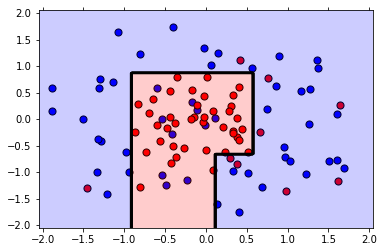

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=16,
                       random_state=42)


In [21]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune.
# Multiple of 2 because a tree should have min of 2 to be balanced.
parameters = {
    'max_depth': [(i + 1) * 2 for i in range(10)],
    'min_samples_leaf': [(i + 1) * 2 for i in range(10)],
    'min_samples_split': [(i + 1) * 2 for i in range(10)]
}

def calculate_F1_Score(parameters):
    # TODO: Make an fbeta_score scoring object.
    scorer = make_scorer(f1_score)

    # TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
    grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, verbose=3)

    # TODO: Fit the grid search object to the training data and find the optimal parameters.
    grid_fit = grid_obj.fit(X_train, y_train)

    # TODO: Get the estimator.
    best_clf = grid_fit.best_estimator_

    # Fit the new model.
    best_clf.fit(X_train, y_train)

    # Make predictions using the new model.
    best_train_predictions = best_clf.predict(X_train)
    best_test_predictions = best_clf.predict(X_test)

    # Calculate the f1_score of the new model.
    print('The training F1 Score is', f1_score(best_train_predictions, y_train))
    print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

    # Plot the new model.
    plot_model(X, y, best_clf)

    # Let's also explore what parameters ended up being used in the new model.
    print(best_clf)

#----------------------------------------------#

# Call the function
calculate_F1_Score(parameters)

In [29]:
%reset

# Import our libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
sns.set(style="ticks")

import utils.check_file as ch

%matplotlib inline

# Read in our dataset
diabetes = pd.read_csv('data/training_n_tuning_diabetes.csv')

# Take a look at the first few rows of the dataset
diabetes.head()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
# Cells for work
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


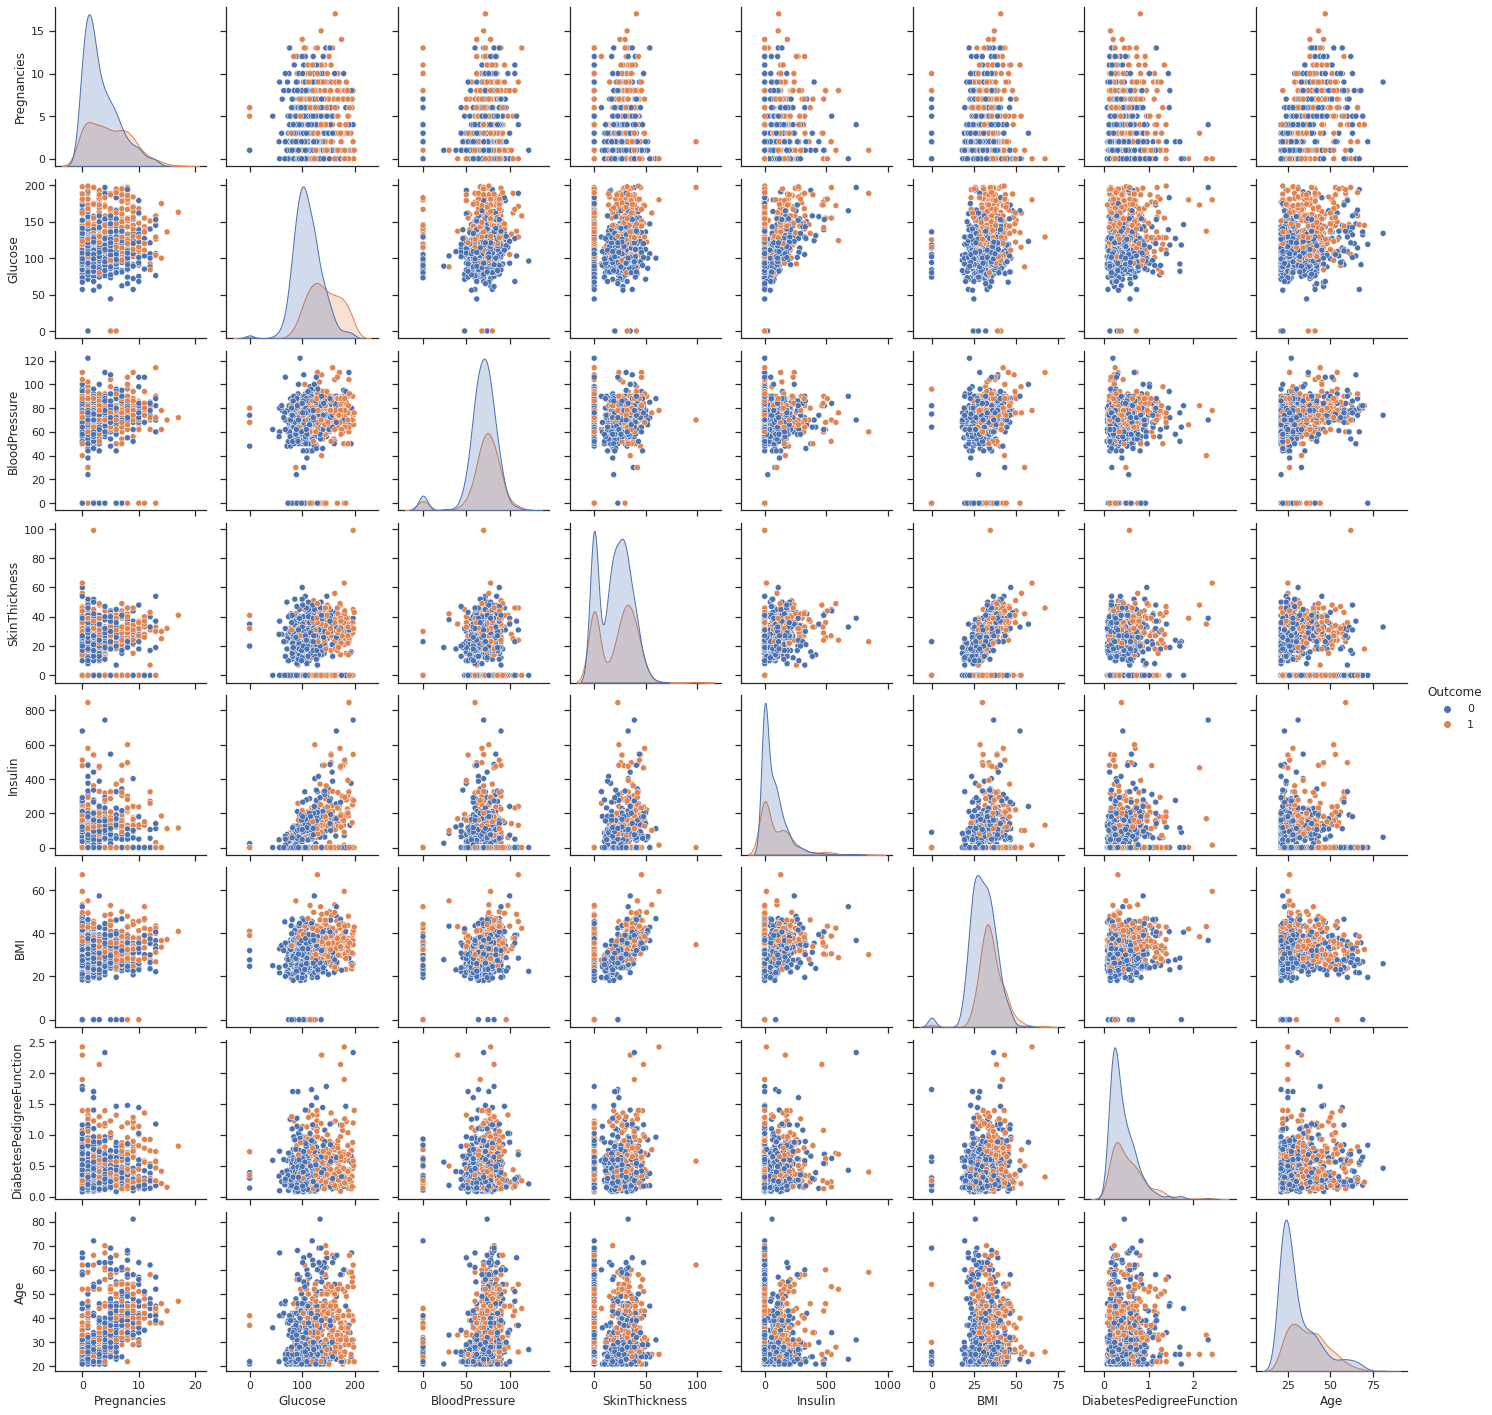

In [31]:
sns.pairplot(diabetes, hue="Outcome");

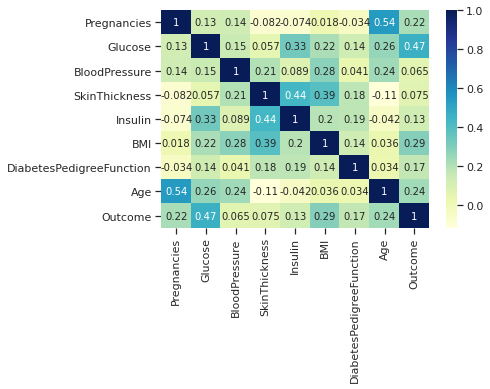

In [32]:
sns.heatmap(diabetes.corr(), annot=True, cmap="YlGnBu");

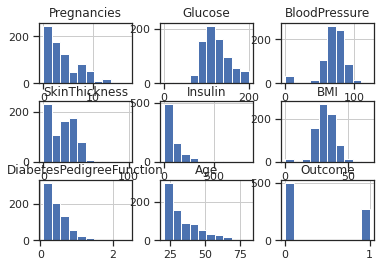

In [33]:
diabetes.hist();

In [34]:
# Possible keys for the dictionary
a = '0.65'
b = '0'
c = 'Age'
d = '0.35'
e = 'Glucose'
f = '0.5'
g = "More than zero"

# Fill in the dictionary with the correct values here
answers_one = {
    'The proportion of diabetes outcomes in the dataset': d,
    'The number of missing data points in the dataset': b,
    'A dataset with a symmetric distribution': e,
    'A dataset with a right-skewed distribution': c, 
    'This variable has the strongest correlation with the outcome': e
}

# Just to check your answer, don't change this
ch.check_one(answers_one)

Awesome! These all look great!


In [35]:
y = diabetes['Outcome']
X = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# build a classifier
clf_rf = RandomForestClassifier()

# Set up the hyperparameter search
param_dist = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Make predictions on the test data
rf_preds = random_search.best_estimator_.predict(X_test)

ch.print_metrics(y_test, rf_preds, 'random forest')

Accuracy score for random forest : 0.7532467532467533
Precision score random forest : 0.660377358490566
Recall score random forest : 0.6363636363636364
F1 score random forest : 0.6481481481481481





In [37]:
# build a classifier for ada boost
clf_aboost = AdaBoostClassifier()

# Set up the hyperparameter search
# look at  setting up your search for n_estimators, learning_rate
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
param_dist_adaboost = {
    "n_estimators": list(range(10, 200)),
    "learning_rate": [(i + 1) for i in range(10)]
}

# Run a randomized search over the hyperparameters
random_search_aboost = RandomizedSearchCV(clf_aboost, param_distributions=param_dist_adaboost)

# Fit the model on the training data
best_fit_aboost = random_search_aboost.fit(X_train, y_train)


# Make predictions on the test data
ada_preds_aboost = best_fit_aboost.best_estimator_.predict(X_test)

# Return your metrics on test data
ch.print_metrics(y_test, ada_preds_aboost, 'adaboost')

Accuracy score for adaboost : 0.7467532467532467
Precision score adaboost : 0.6290322580645161
Recall score adaboost : 0.7090909090909091
F1 score adaboost : 0.6666666666666666





In [38]:
# build a classifier for support vector machines
clf_svc = SVC()

# Set up the hyperparameter search
# look at setting up your search for C (recommend 0-10 range), 
# kernel, and degree
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
param_dist_svc = {
    "C": list(range(0, 10)),
    "kernel": ['linear','rbf']
}


# Run a randomized search over the hyperparameters
random_search_svc = RandomizedSearchCV(clf_svc, param_distributions=param_dist_svc)

# Fit the model on the training data
best_fit_svc = random_search_aboost.fit(X_train, y_train)

# Make predictions on the test data
svc_preds = best_fit_svc.best_estimator_.predict(X_test)


# Return your metrics on test data
ch.print_metrics(y_test, svc_preds, 'svc')

Accuracy score for svc : 0.7467532467532467
Precision score svc : 0.6481481481481481
Recall score svc : 0.6363636363636364
F1 score svc : 0.6422018348623852





In [39]:
a = 'randomforest'
b = 'adaboost'
c = 'supportvector'

best_model =  b # put your best model here as a string or variable

# See if your best model was also mine.  
# Notice these might not match depending your search!
ch.check_best(best_model)

Nice!  It looks like your best model matches the best model I found as well!  It makes sense to use f1 score to determine best in this case given the imbalance of classes.  There might be justification for precision or recall being the best metric to use as well - precision showed to be best with adaboost again.  With recall, SVMs proved to be the best for our models.


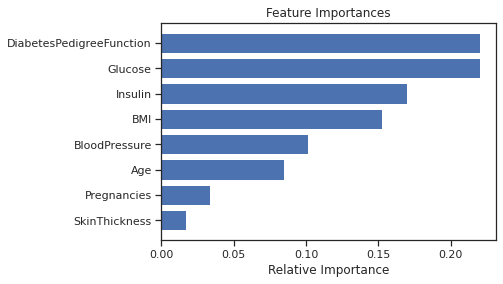

In [40]:
# Show your work here - the plot below was helpful for me
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python
features = diabetes.columns[:diabetes.shape[1]]
importances = best_fit_aboost.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [41]:
# Check your solution by matching the correct values in the dictionary
# and running this cell
a = 'Age'
b = 'BloodPressure'
c = 'BMI'
d = 'DiabetesPedigreeFunction'
e = 'Insulin'
f = 'Glucose'
g = 'Pregnancy'
h = 'SkinThickness'



sol_seven = {
    'The variable that is most related to the outcome of diabetes' : f,
    'The second most related variable to the outcome of diabetes' : c,
    'The third most related variable to the outcome of diabetes' : a,
    'The fourth most related variable to the outcome of diabetes' : d
}

ch.check_q_seven(sol_seven)

That's right!  Some of these were expected, but some were a bit unexpected too!


**In this case study, we looked at predicting diabetes for 768 patients.  There was a reasonable amount of class imbalance with just under 35% of patients having diabetes.  There were no missing data, and initial looks at the data showed it would be difficult to separate patients with diabetes from those that did not have diabetes.**

**Three advanced modeling techniques were used to predict whether or not a patient has diabetes.  The most successful of these techniques proved to be an AdaBoost Classification technique, which had the following metrics:**

Accuracy score for adaboost : 0.7792207792207793

Precision score adaboost : 0.7560975609756098

Recall score adaboost : 0.5636363636363636

F1 score adaboost : 0.6458333333333333


**Based on the initial look at the data, it is unsurprising that `Glucose`, `BMI`, and `Age` were important in understanding if a patient has diabetes.  These were consistent with more sophisticated approaches.  Interesting findings were that pregnancy looked to be correlated when initially looking at the data.  However, this was likely due to its large correlation with age.**